In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import csv
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
def undersample_df(X,label):
    x = X.copy()
    y = label.copy()
    df = pd.concat([x,y],axis=1)
    num_pos = df.loc[df['not_commenter']== 1].shape[0]
    num_neg = df.loc[df['not_commenter']==-1].shape[0]
    
    if num_pos<num_neg:
        df1=df.loc[df['not_commenter']==-1].sample(n=num_pos)
        df2=df.loc[df['not_commenter']== 1]
    else:
        df1=df.loc[df['not_commenter']==-1]
        df2=df.loc[df['not_commenter']== 1].sample(n=num_neg)
    
    df = pd.concat([df1,df2])
    
    y = df['not_commenter'].to_frame()
    df = df.drop(columns=['not_commenter'])
    
    return df,y

In [4]:
class LR:
    
    """
    X: an array containing the X for training and testing
    Y: an array containing the labels for training and testing
    """
    
    def __init__(self,X,Y,cv=10,test_size=0.1):
        self.X = X
        self.y = Y
        self.model = LogisticRegressionCV(cv=cv,solver='lbfgs')
        self.trainX, self.testX, self.trainy, self.testy = train_test_split(X, Y, test_size=test_size, random_state=2)
    
    def train(self):
        print("Beginning trainning...")
        self.model.fit(self.trainX,self.trainy)
        print("Training complete.\nAverage Score on 10-fold Cross Validation:")
        print("\t %.4f %%\n" % (self.model.score(self.trainX,self.trainy)*100))
    
    def test(self):
        print("Beginning testing...")
        test_score = self.model.score(self.testX,self.testy)
        print("Testing complete.\nAverage Score on 10-fold Cross Validation:")
        print("\t %.4f %%\n" % (test_score*100))
        
    def roc(self,filename = None):
        print("Plotting ROC Curve")
        scorey = self.model.decision_function(self.testX)
        n_classes = self.testy.shape[0]
        
        fpr, tpr, _ = roc_curve(self.testy, scorey)
        roc_auc = auc(fpr, tpr)
        
        self.fpr = fpr
        self.tpr = tpr

        plt.figure()
        
        lw = 2
        
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show();
        
        if filename != None:
            print("Saving "+filename+"_ROC.png")
            plt.savefig('figures/'+filename+'.png')
            df1 = pd.DataFrame(fpr,columns=['FPR'])
            df2 = pd.DataFrame(tpr,columns=['TPR'])
            df = pd.concat([df1,df2],axis=1)
            print("csv/Saving "+filename+"_ROC.csv")
            df.to_csv('csv/'+filename+'.csv',index=False)

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 86.4424 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 86.5835 %

Plotting ROC Curve


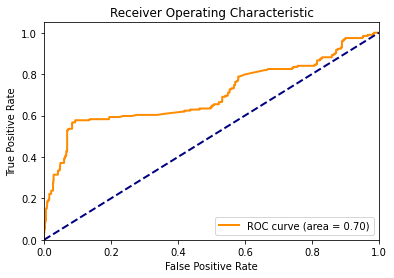

Saving Base_v0_ROC.png
csv/Saving Base_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [5]:
X = pd.read_csv('../VarianceAnalysis/db/Base_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

# X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

a = LR(X,y)
a.train()
a.test()
a.roc(filename='Base_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 68.5885 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 70.4156 %

Plotting ROC Curve


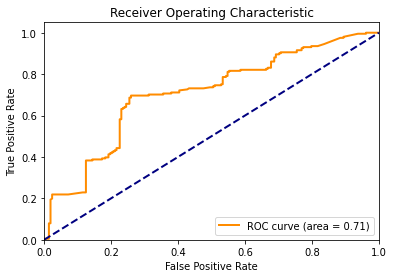

Saving uBase_v0_ROC.png
csv/Saving uBase_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [6]:
X = pd.read_csv('../VarianceAnalysis/db/Base_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

ua = LR(X,y)
ua.train()
ua.test()
ua.roc(filename='uBase_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 86.4424 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 86.5835 %

Plotting ROC Curve


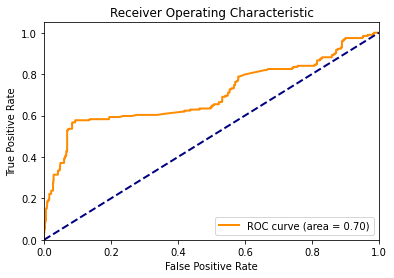

Saving BaseCampaign_v0_ROC.png
csv/Saving BaseCampaign_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [7]:
X = pd.read_csv('../VarianceAnalysis/db/BaseCampaign_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

# X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

b = LR(X,y)
b.train()
b.test()
b.roc(filename='BaseCampaign_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 68.1806 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 63.5697 %

Plotting ROC Curve


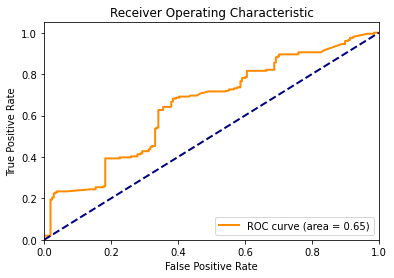

Saving uBaseCampaign_v0_ROC.png
csv/Saving uBaseCampaign_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [8]:
X = pd.read_csv('../VarianceAnalysis/db/BaseCampaign_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

ub = LR(X,y)
ub.train()
ub.test()
ub.roc(filename='uBaseCampaign_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 95.4837 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.5538 %

Plotting ROC Curve


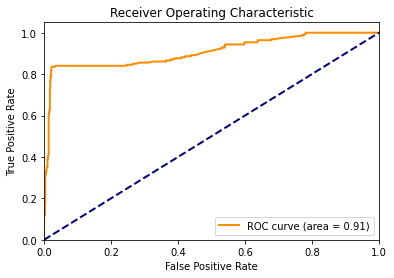

Saving BaseCampaignBin_v0_ROC.png
csv/Saving BaseCampaignBin_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [9]:
X = pd.read_csv('../VarianceAnalysis/db/BaseCampaignBin_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

# X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

c = LR(X,y)
c.train()
c.test()
c.roc(filename='BaseCampaignBin_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 90.2366 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 89.4866 %

Plotting ROC Curve


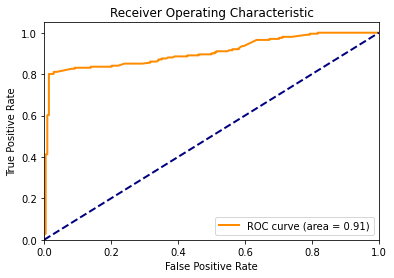

Saving uBaseCampaignBin_v0_ROC.png
csv/Saving uBaseCampaignBin_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [10]:
X = pd.read_csv('../VarianceAnalysis/db/BaseCampaignBin_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

uc = LR(X,y)
uc.train()
uc.test()
uc.roc(filename='uBaseCampaignBin_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 94.7035 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.0078 %

Plotting ROC Curve


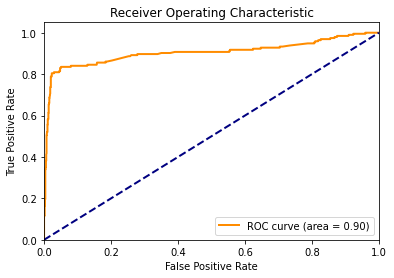

Saving BaseBow_v0_ROC.png
csv/Saving BaseBow_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [11]:
X = pd.read_csv('../VarianceAnalysis/db/BaseBow_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

# X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

d = LR(X,y)
d.train()
d.test()
d.roc(filename='BaseBow_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 90.2638 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 86.5526 %

Plotting ROC Curve


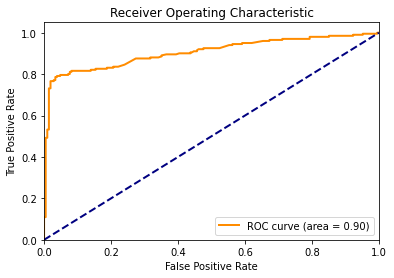

Saving uBaseBow_v0_ROC.png
csv/Saving uBaseBow_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [12]:
X = pd.read_csv('../VarianceAnalysis/db/BaseBow_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

ud = LR(X,y)
ud.train()
ud.test()
ud.roc(filename='uBaseBow_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 94.7382 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.2418 %

Plotting ROC Curve


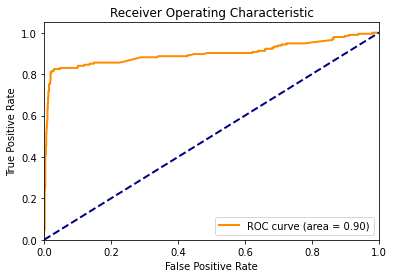

Saving BaseBowBin_v0_ROC.png
csv/Saving BaseBowBin_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [13]:
X = pd.read_csv('../VarianceAnalysis/db/BaseBowBin_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

# X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

e = LR(X,y)
e.train()
e.test()
e.roc(filename='BaseBowBin_v0')

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 89.5839 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 89.2421 %

Plotting ROC Curve


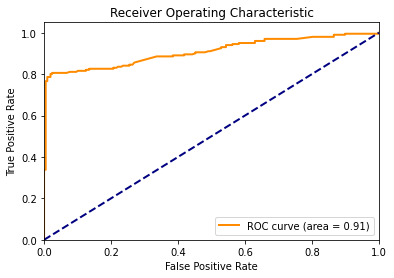

Saving uBaseBowBin_v0_ROC.png
csv/Saving uBaseBowBin_v0_ROC.csv


<Figure size 432x288 with 0 Axes>

In [14]:
X = pd.read_csv('../VarianceAnalysis/db/BaseBowBin_v0.csv')
y = pd.read_csv('../VarianceAnalysis/db/Y.csv')

X,y = undersample_df(X,y)

X = X.to_numpy()
y = y.to_numpy()

ue = LR(X,y)
ue.train()
ue.test()
ue.roc(filename='uBaseBowBin_v0')